In [ ]:
import pandas as pd
import os

# Update the path to your local Common Voice dataset
data_path = r"C:\Users\SRI  DEVI\Downloads\dataset\cv-corpus-21.0-delta-2025-03-14\en"

# Load validated.tsv into a DataFrame
df = pd.read_csv(os.path.join(data_path, "validated.tsv"), sep="\t")

# Quick check
df.head()


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\SRI  DEVI\\Downloads\\dataset\\cv-corpus-21.0-delta-2025-03-14\\en/validated.tsv'

In [ ]:
import pandas as pd

# Assuming you uploaded 'validated.tsv'
df = pd.read_csv("validated.tsv", sep="\t")
df.head()


,client_id,path,sentence_id,sentence,sentence_domain,up_votes,down_votes,age,gender,accents,variant,locale,segment
0,116398939d6be70fc5fb532924a130c0adf286ac283499...,common_voice_en_41923025.mp3,f5a2a431746c5229ab696ba0e1a518fe7b26e208ff3b84...,"He was born at Wichenford, in Worcestershire, ...",NaN,2,0,thirties,NaN,United States English,NaN,en,NaN
1,24a4da2e8f053a45a0715849c222a40a4b0da9872efb2e...,common_voice_en_42356358.mp3,f6f009587d8812c147af1cc05079e1fcd8120c8a98cdf8...,The Portuguese division was overrun and withdr...,NaN,2,0,teens,NaN,United States English,NaN,en,NaN
2,30849595699bc853c3810a78448acede46888b4e2d0809...,common_voice_en_42165090.mp3,f69afa5e77812e8be0085c874d2a9767323c78ffb43ba6...,Her health by this stage was also poor.,NaN,2,0,NaN,NaN,NaN,NaN,en,NaN
3,42d53f34c1bc50f7a7c4ed1765a8d1ffeaf5cd441513cc...,common_voice_en_41921729.mp3,f5739acbefdbd3aac990792966fac4d40dcb39eb8dfa21...,His sporting interests outside of cricket incl...,NaN,2,0,nineties,NaN,England English,NaN,en,NaN
4,436b9e1f9da710d74eb01209f8f269bee70e93cadf2053...,common_voice_en_42528393.mp3,f7d35c60d76f025c45a9495757d1ee0e2b7c206317a288...,The following year he was elected to be part o...,NaN,2,0,teens,NaN,United States English,NaN,en,NaN


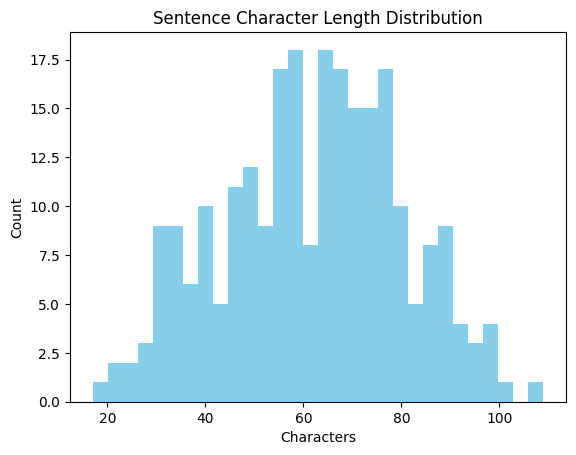

In [ ]:
import matplotlib.pyplot as plt

df['sentence_length'] = df['sentence'].dropna().apply(len)
plt.hist(df['sentence_length'], bins=30, color='skyblue')
plt.title("Sentence Character Length Distribution")
plt.xlabel("Characters")
plt.ylabel("Count")
plt.show()


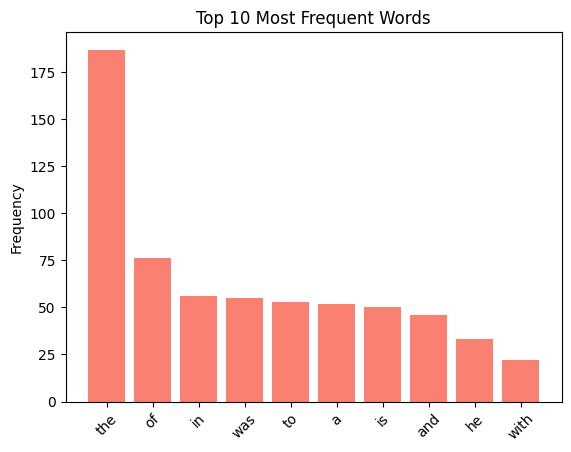

In [ ]:
from collections import Counter

words = " ".join(df['sentence'].dropna().tolist()).lower().split()
common = Counter(words).most_common(10)
labels, values = zip(*common)

plt.bar(labels, values, color='salmon')
plt.title("Top 10 Most Frequent Words")
plt.xticks(rotation=45)
plt.ylabel("Frequency")
plt.show()


In [ ]:
import librosa

y, sr = librosa.load("your_audio_file.mp3")
duration = len(y) / sr
print("Duration (s):", duration)


<ipython-input-6-a7aece8f439f>:3: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load("your_audio_file.mp3")
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


FileNotFoundError: [Errno 2] No such file or directory: 'your_audio_file.mp3'

In [ ]:
!pip install librosa matplotlib


In [ ]:
from google.colab import files
uploaded = files.upload()


KeyboardInterrupt: 

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving common_voice_en_41910499.mp3 to common_voice_en_41910499.mp3
Saving common_voice_en_41910499.wav to common_voice_en_41910499.wav
Saving common_voice_en_41910500.mp3 to common_voice_en_41910500.mp3
Saving common_voice_en_41910501.mp3 to common_voice_en_41910501.mp3
Saving common_voice_en_41910502.mp3 to common_voice_en_41910502.mp3
Saving common_voice_en_41910503.mp3 to common_voice_en_41910503.mp3
Saving common_voice_en_41910504.mp3 to common_voice_en_41910504.mp3
Saving common_voice_en_41910505.mp3 to common_voice_en_41910505.mp3
Saving common_voice_en_41910506.mp3 to common_voice_en_41910506.mp3
Saving common_voice_en_41910507.mp3 to common_voice_en_41910507.mp3


In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
audio_path = "common_voice_en_41910499.mp3"  # Replace with your uploaded filename
y, sr = librosa.load(audio_path)

print(f"Sample Rate: {sr}")
print(f"Duration: {len(y)/sr:.2f} seconds")


Sample Rate: 22050
Duration: 3.10 seconds


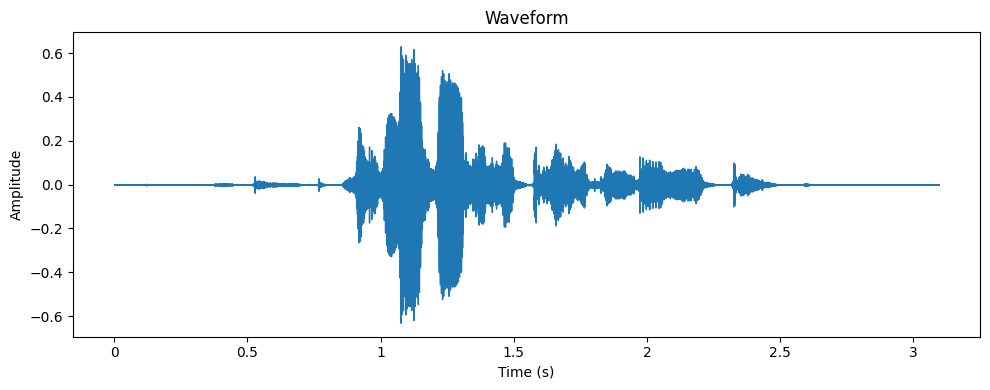

In [ ]:
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.title("Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()


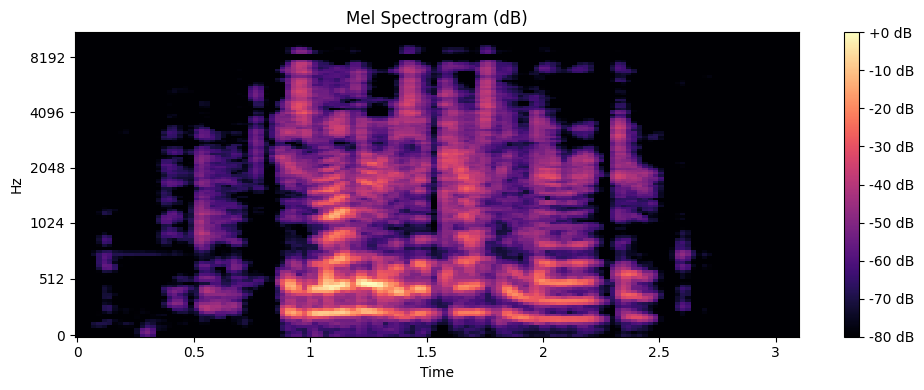

In [ ]:
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
S_dB = librosa.power_to_db(S, ref=np.max)

plt.figure(figsize=(10, 4))
librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel')
plt.title("Mel Spectrogram (dB)")
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()


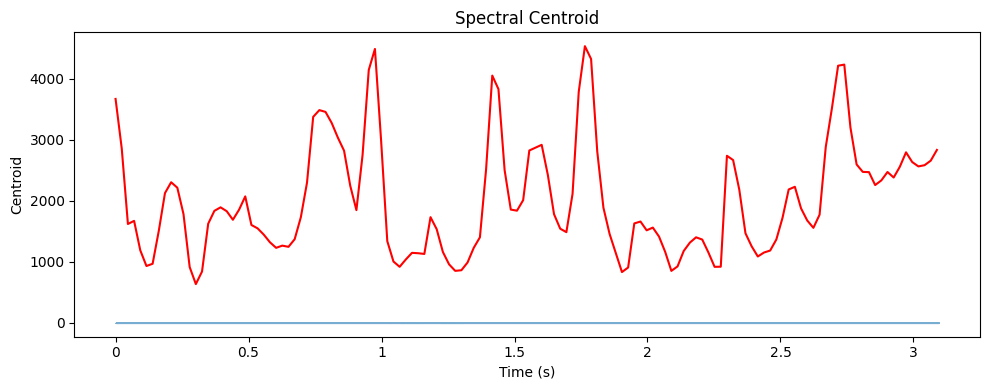

In [ ]:
centroid = librosa.feature.spectral_centroid(y=y, sr=sr)[0]
frames = range(len(centroid))
t = librosa.frames_to_time(frames)

plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr, alpha=0.6)
plt.plot(t, centroid, color='r')
plt.title("Spectral Centroid")
plt.xlabel("Time (s)")
plt.ylabel("Centroid")
plt.tight_layout()
plt.show()


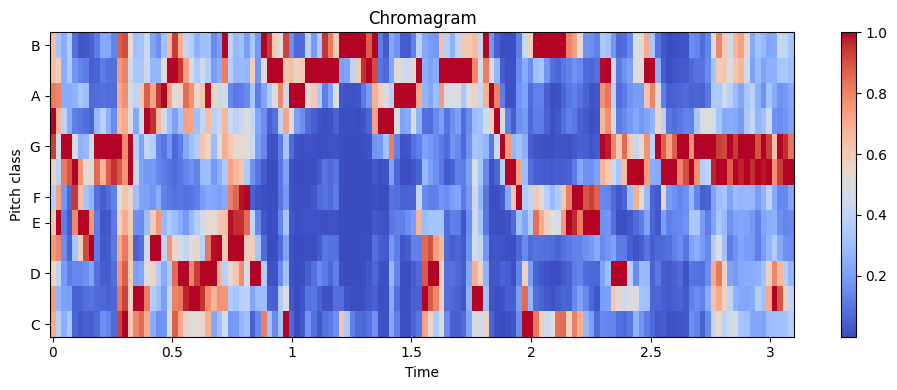

In [ ]:
chroma = librosa.feature.chroma_stft(y=y, sr=sr)

plt.figure(figsize=(10, 4))
librosa.display.specshow(chroma, x_axis='time', y_axis='chroma', cmap='coolwarm', sr=sr)
plt.title("Chromagram")
plt.colorbar()
plt.tight_layout()
plt.show()
